# **Evolutionary algorithm to solve Traveling Salesman Problem**

---



**Traveling Salesman Problem (TSP)**
>Given a list of cities and the distances between each pair of cities, Find the shortest possible route that visits each city and returns to the origin city. 

<br>**Evolutionary Algorithm**
>initialize population
<br>find fitness of population
<br>while (termination criteria is reached) do
* parent selection
* crossover with probability pc
* mutation with probability pm
* decode and fitness calculation
* survivor selection
* find best
<br>**return best**

In [83]:
# Header files
import numpy as np

# Representation
city_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
distance_matrix = np.array([[ 0, 8, 2, 3, 7, 2, 5 ],
                            [ 8, 0, 3, 5, 1, 8, 2 ],
                            [ 2, 3, 0, 2, 2, 6, 8 ],
                            [ 3, 5, 2, 0, 6, 2, 2 ],
                            [ 7, 1, 2, 6, 0, 3, 5 ],
                            [ 2, 8, 6, 2, 3, 0, 1 ],
                            [ 5, 2, 8, 2, 5, 1, 0 ]])
print("Distance Matrix \n")
print("     A   B   C   D   E   F   G")
for row_label, row in zip(city_names, distance_matrix):
    print('%s [%s]' % (row_label, ' '.join('%03s' % i for i in row)))

Distance Matrix 

     A   B   C   D   E   F   G
A [  0   8   2   3   7   2   5]
B [  8   0   3   5   1   8   2]
C [  2   3   0   2   2   6   8]
D [  3   5   2   0   6   2   2]
E [  7   1   2   6   0   3   5]
F [  2   8   6   2   3   0   1]
G [  5   2   8   2   5   1   0]


# **Implementation of functions using Python code**

Representation - Permutation Representation
<br>Recombination - Ordered crossover
<br>Recombination Probability - 100%
<br>Mutation - Inversion
<br>Mutation Probability - 50%
<br>Parent Selection - Best fit 6 individuals from current generation population
<br>Survival Selection - Replace worst
<br>Number of offspring - 2
<br>Initialization - Random 10 parents
<br>Termination condition - fitness <= 13

# Permutation Representation
*Salesman has to take a tour of all the cities, visiting each city exactly once and come back to the starting city. The total distance of the tour has to be minimized. The solution to this TSP is naturally an ordering or permutation of all the cities and therefore using a permutation representation makes sense for this problem.*

In [84]:
# header files

import pandas as pd
import random
import numpy as np

In [85]:
# Permutation Representation

city_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cities = [0, 1, 2, 3, 4, 5, 6]

city_dictionary = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

A = ( [ 0, 8, 2, 3, 7, 2, 5 ],
      [ 8, 0, 3, 5, 1, 8, 2 ],
      [ 2, 3, 0, 2, 2, 6, 8 ],
      [ 3, 5, 2, 0, 6, 2, 2 ],
      [ 7, 1, 2, 6, 0, 3, 5 ],
      [ 2, 8, 6, 2, 3, 0, 1 ],
      [ 5, 2, 8, 2, 5, 1, 0 ])

distance_matrix = np.array([[ 0, 8, 2, 3, 7, 2, 5 ],
                            [ 8, 0, 3, 5, 1, 8, 2 ],
                            [ 2, 3, 0, 2, 2, 6, 8 ],
                            [ 3, 5, 2, 0, 6, 2, 2 ],
                            [ 7, 1, 2, 6, 0, 3, 5 ],
                            [ 2, 8, 6, 2, 3, 0, 1 ],
                            [ 5, 2, 8, 2, 5, 1, 0 ]])
print("Distance Matrix \n")
print("     0   1   2   3   4   5   5")
for row_label, row in zip(cities, distance_matrix):
    print('%s [%s]' % (row_label, ' '.join('%03s' % i for i in row)))

Distance Matrix 

     0   1   2   3   4   5   5
0 [  0   8   2   3   7   2   5]
1 [  8   0   3   5   1   8   2]
2 [  2   3   0   2   2   6   8]
3 [  3   5   2   0   6   2   2]
4 [  7   1   2   6   0   3   5]
5 [  2   8   6   2   3   0   1]
6 [  5   2   8   2   5   1   0]


# POPULATION INITIALIZATION
Create n random parents as initial population
<br>*Population : a collection of possible routes (i.e., collection of individuals)*
<br>*Population Size : Random 10 parents*

In [86]:
def create_initial_population(pop_size):
    from numpy.random import default_rng
    rng = default_rng()
    for i in range(pop_size):
        pop.loc[i] = rng.choice(7, size=7, replace=False)
    return pop

# FITNESS FUNCTION CALCULATION
Define fitness function that measures the total distance of a route

In [87]:
# Define a fitness function that measures the total distance of a route
def fitness(tour):
    total_distance = 0
    for i in range(len(tour)):
        city1 = tour[i]
        city2 = tour[(i+1)%len(tour)]
        total_distance += A[int(city1)][int(city2)]
    return total_distance

# CROSSOVER
Executes an ordered crossover (OX) on the input individuals.

In [88]:
def crossover(old_p1, old_p2):
    p1 = old_p1[0:len(old_p1)]
    p2 = old_p2[0:len(old_p2)]
    
    c1 = [-1]*len(p1)
    c2 = [-1]*len(p1)
    
    cut_1 = random.randint(1,len(p1)//2)
    cut_2 = random.randint(cut_1+1,len(p1)-1)

    c1[cut_1:cut_2+1] = p1[cut_1:cut_2+1]
    c2[cut_1:cut_2+1] = p2[cut_1:cut_2+1]
  
    num_to_copy = len(p1) - (cut_2 - cut_1) -1

    k = (cut_2 + 1)%len(p2)
    i = 0
    while(num_to_copy > 0):
      index = (cut_2 + i+1)%len(p2)

      if p2[index] not in c1:
        num_to_copy = num_to_copy - 1
        c1[k] = p2[index]
        k = (k + 1)%len(p2)
      i = i + 1  

    num_to_copy = len(p1) - (cut_2 - cut_1) -1
    
    k = (cut_2 + 1)%len(p1)
    i = 0
    while(num_to_copy > 0):
      index = (cut_2 + i+1)%len(p1)

      if p1[index] not in c2:
        num_to_copy = num_to_copy - 1
        c2[k] = p1[index]
        k = (k + 1)%len(p1)   
      i = i + 1  

    return c1, c2

# MUTATION
Mutation to the Genotypes
<br>*Mutation : a way to introduce variation in our population by randomly swapping two cities in a route*

In [89]:
def mutation(C):
    new_child = C[0:len(C)]
    cut_1 = random.randint(1,len(new_child)//2)
    cut_2 = random.randint(cut_1+1,len(new_child)-1)

    mutated_child = [-1]*len(new_child)
    mutated_child[0:cut_1] = new_child[0:cut_1]
    mutated_child[cut_1:cut_2+1] = new_child[cut_2:cut_1-1:-1]
    mutated_child[cut_2+1:len(new_child)] = new_child[cut_2+1:len(new_child)]
    
    return mutated_child

# **Main function**
<br>Working Sample


In [90]:
fitness_count = []
generation_count = []
count_fitness = 0
count_generation = 0
generation = 0

data = {'City 1': [],
        'City 2': [],
        'City 3': [],
        'City 4': [],
        'City 5': [],
        'City 6': [],
        'City 7': []}
pop = pd.DataFrame(data)

print(" \n Initial population of Random 10 initial parents with their fitness value attached :\n")
print("           < 10 Paths with their total distance of travelling attached > \n")
pop_size = 10
pop = create_initial_population(pop_size)
# fitness check
distance = []
for i in range(len(pop)):
    distance = np.append(distance,fitness(pop.loc[i]))
    count_fitness = count_fitness + 1
pop['Fitness'] = distance
print(pop)

while(generation < 5):
    # Remove Fitness column from Dataframe
    pop = pop.iloc[: , :-1]
    generation = generation + 1
    print("\n 5 Best fit of Generation {0} :\n".format(int(generation)))
    # Select best parents based on fitness
    n = len(pop)
    for i in range(n):
        # Parents for crossover to produce children
        C1,C2 = crossover(pop.iloc[i],pop.iloc[i+1])
        # Adding new children after mutation to the population
        do_mutuation = np.random.rand()
        if(do_mutuation < 0.5):
          pop.loc[len(pop)] = mutation(C1)
        else:
          pop.loc[len(pop)] = mutation(C2)
    # fitness check
    distance = []
    for i in range(len(pop)):
        distance = np.append(distance,fitness(pop.loc[i]))
        count_fitness = count_fitness + 1
    pop['Fitness'] = distance
    # Sort to find minimum distance
    pop = pop.sort_values(by=['Fitness'], ascending=True)
    pop = pop.drop_duplicates()
    # Select best 5 parents for next generation
    pop = pop.head(5)
    pop = pop.reset_index()
    pop = pop.drop(['index'], axis=1)
    count_generation = count_generation + 1

    print(pop)

print("\n*************************************************************")
print("Fitness checked {0} times".format(int(count_fitness)))
print("Number of generations created {0} times".format(int(count_generation)))
fitness_count = np.append(fitness_count,count_fitness)
generation_count = np.append(generation_count,count_generation)
print("*************************************************************\n")

 
 Initial population of Random 10 initial parents with their fitness value attached :

           < 10 Paths with their total distance of travelling attached > 

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     3.0     5.0     0.0     4.0     2.0     1.0     6.0     20.0
1     1.0     0.0     6.0     4.0     2.0     3.0     5.0     32.0
2     5.0     0.0     3.0     1.0     6.0     4.0     2.0     25.0
3     6.0     5.0     3.0     0.0     1.0     4.0     2.0     25.0
4     1.0     2.0     5.0     0.0     4.0     6.0     3.0     30.0
5     3.0     2.0     1.0     0.0     6.0     5.0     4.0     28.0
6     6.0     4.0     0.0     1.0     2.0     3.0     5.0     28.0
7     2.0     6.0     0.0     5.0     1.0     3.0     4.0     36.0
8     2.0     4.0     0.0     3.0     5.0     1.0     6.0     32.0
9     0.0     6.0     1.0     2.0     4.0     5.0     3.0     20.0

 5 Best fit of Generation 1 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0

# **TERMINATE AND RETURN BEST**
<br>Running the sample for 20 Generations

In [91]:
fitness_count = []
generation_count = []
count = 0
while(count<20):
    print("*************** COUNTER {0} ***************\n".format(int(count+1)))
    count_fitness = 0
    count_generation = 0
    generation = 0

    data = {'City 1': [],
            'City 2': [],
            'City 3': [],
            'City 4': [],
            'City 5': [],
            'City 6': [],
            'City 7': []}
    pop = pd.DataFrame(data)

    print(" \n Initial population of Random 10 initial parents with their fitness value attached :\n")
    print("           < 10 Paths with their total distance of travelling attached > \n")
    pop_size = 10
    pop = create_initial_population(pop_size)
    # fitness check
    distance = []
    for i in range(len(pop)):
        distance = np.append(distance,fitness(pop.loc[i]))
        count_fitness = count_fitness + 1
    pop['Fitness'] = distance
    print(pop)

    while(int(pop.loc[0].Fitness)>13):
    #while(generation < 5):
        # Remove Fitness column from Dataframe
        pop = pop.iloc[: , :-1]
        generation = generation + 1
        print("\n 5 Best fit of Generation {0} :\n".format(int(generation)))
        # Select best parents based on fitness
        n = len(pop)
        for i in range(n):
            # Parents for crossover to produce children
            C1,C2 = crossover(pop.iloc[i],pop.iloc[i+1])
            # Adding new children after mutation to the population
            do_mutuation = np.random.rand()
            if(do_mutuation < 0.5):
              pop.loc[len(pop)] = mutation(C1)
            else:
              pop.loc[len(pop)] = mutation(C2)
        # fitness check
        distance = []
        for i in range(len(pop)):
            distance = np.append(distance,fitness(pop.loc[i]))
            count_fitness = count_fitness + 1
        pop['Fitness'] = distance
        # Sort to find minimum distance
        pop = pop.sort_values(by=['Fitness'], ascending=True)
        pop = pop.drop_duplicates()
        # Select best 5 parents for next generation
        pop = pop.head(5)
        pop = pop.reset_index()
        pop = pop.drop(['index'], axis=1)
        count_generation = count_generation + 1

        print(pop)

    print("\n*************************************************************")
    print("Fitness checked {0} times".format(int(count_fitness)))
    print("Number of generations created {0} times".format(int(count_generation)))
    print("*************************************************************\n")
    count = count+1
    fitness_count = np.append(fitness_count,count_fitness)
    generation_count = np.append(generation_count,count_generation)

*************** COUNTER 1 ***************

 
 Initial population of Random 10 initial parents with their fitness value attached :

           < 10 Paths with their total distance of travelling attached > 

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     0.0     5.0     4.0     2.0     6.0     1.0     3.0     25.0
1     4.0     2.0     5.0     3.0     6.0     1.0     0.0     29.0
2     0.0     3.0     6.0     5.0     2.0     1.0     4.0     23.0
3     2.0     5.0     3.0     6.0     4.0     0.0     1.0     33.0
4     5.0     4.0     2.0     0.0     6.0     1.0     3.0     21.0
5     2.0     6.0     4.0     0.0     5.0     1.0     3.0     37.0
6     2.0     6.0     5.0     3.0     1.0     0.0     4.0     33.0
7     0.0     2.0     3.0     4.0     5.0     6.0     1.0     24.0
8     1.0     3.0     5.0     4.0     0.0     6.0     2.0     33.0
9     3.0     6.0     5.0     1.0     0.0     2.0     4.0     29.0

 5 Best fit of Generation 1 :

   City 1  City 2  City 3

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-91-6b059cd95e8d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Fitness'] = distance


   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     4.0     5.0     3.0     2.0     0.0     6.0     1.0     17.0
1     4.0     5.0     3.0     0.0     2.0     6.0     1.0     21.0
2     1.0     4.0     5.0     6.0     2.0     0.0     3.0     23.0
3     1.0     2.0     4.0     6.0     0.0     5.0     3.0     24.0
4     6.0     5.0     3.0     0.0     1.0     4.0     2.0     25.0

 5 Best fit of Generation 2 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     4.0     5.0     3.0     2.0     0.0     6.0     1.0     17.0
1     4.0     0.0     2.0     3.0     5.0     6.0     1.0     17.0
2     5.0     0.0     3.0     2.0     1.0     4.0     6.0     17.0
3     5.0     3.0     6.0     0.0     2.0     1.0     4.0     18.0
4     2.0     4.0     1.0     0.0     5.0     6.0     3.0     18.0

 5 Best fit of Generation 3 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     4.0     2.0     3.0     0.0     5.0     6.0     1.0     13.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-91-6b059cd95e8d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Fitness'] = distance
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     3.0     2.0     1.0     4.0     5.0     0.0     6.0     18.0
1     3.0     6.0     0.0     5.0     4.0     1.0     2.0     18.0
2     2.0     3.0     6.0     5.0     0.0     1.0     4.0     18.0
3     3.0     6.0     0.0     2.0     1.0     4.0     5.0     18.0
4     2.0     3.0     6.0     5.0     4.0     1.0     0.0     19.0

 5 Best fit of Generation 4 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     3.0     2.0     1.0     4.0     5.0     0.0     6.0     18.0
1     3.0     6.0     0.0     5.0     4.0     1.0     2.0     18.0
2     2.0     3.0     6.0     5.0     0.0     1.0     4.0     18.0
3     3.0     6.0     0.0     2.0     1.0     4.0     5.0     18.0
4     6.0     5.0     0.0     4.0     1.0     2.0     3.0     18.0

 5 Best fit of Generation 5 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     3.0     2.0     1.0     4.0     5.0     0.0     6.0     18.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-91-6b059cd95e8d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Fitness'] = distance


   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     4.0     1.0     6.0     5.0     0.0     2.0     3.0     16.0
1     5.0     0.0     3.0     6.0     1.0     2.0     4.0     17.0
2     3.0     0.0     5.0     6.0     1.0     2.0     4.0     19.0
3     5.0     3.0     0.0     4.0     2.0     1.0     6.0     20.0
4     5.0     3.0     0.0     6.0     1.0     2.0     4.0     20.0

 5 Best fit of Generation 12 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     4.0     1.0     6.0     3.0     2.0     0.0     5.0     14.0
1     4.0     1.0     6.0     5.0     0.0     2.0     3.0     16.0
2     5.0     0.0     3.0     6.0     1.0     2.0     4.0     17.0
3     3.0     0.0     5.0     6.0     1.0     2.0     4.0     19.0
4     5.0     3.0     0.0     4.0     2.0     1.0     6.0     20.0

 5 Best fit of Generation 13 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     4.0     1.0     6.0     3.0     2.0     0.0     5.0     1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-91-6b059cd95e8d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Fitness'] = distance


*************** COUNTER 13 ***************

 
 Initial population of Random 10 initial parents with their fitness value attached :

           < 10 Paths with their total distance of travelling attached > 

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     0.0     3.0     4.0     6.0     5.0     2.0     1.0     32.0
1     2.0     4.0     6.0     3.0     1.0     5.0     0.0     26.0
2     1.0     4.0     3.0     6.0     5.0     0.0     2.0     17.0
3     6.0     5.0     3.0     0.0     1.0     4.0     2.0     25.0
4     5.0     3.0     6.0     4.0     1.0     0.0     2.0     26.0
5     0.0     5.0     2.0     1.0     3.0     6.0     4.0     30.0
6     2.0     4.0     3.0     6.0     5.0     0.0     1.0     24.0
7     6.0     3.0     4.0     5.0     1.0     0.0     2.0     37.0
8     5.0     3.0     2.0     1.0     6.0     4.0     0.0     23.0
9     5.0     4.0     2.0     0.0     6.0     1.0     3.0     21.0

 5 Best fit of Generation 1 :

   City 1  City 2  City 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-91-6b059cd95e8d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Fitness'] = distance


   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     2.0     0.0     3.0     5.0     6.0     4.0     1.0     17.0
1     2.0     0.0     3.0     6.0     5.0     1.0     4.0     19.0
2     0.0     1.0     4.0     6.0     5.0     3.0     2.0     21.0
3     1.0     2.0     4.0     5.0     6.0     3.0     0.0     22.0
4     6.0     3.0     1.0     2.0     0.0     5.0     4.0     22.0

 5 Best fit of Generation 5 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     2.0     0.0     3.0     5.0     6.0     4.0     1.0     17.0
1     2.0     0.0     3.0     6.0     5.0     1.0     4.0     19.0
2     0.0     1.0     4.0     6.0     5.0     3.0     2.0     21.0
3     1.0     2.0     4.0     6.0     5.0     0.0     3.0     21.0
4     1.0     2.0     4.0     5.0     6.0     3.0     0.0     22.0

 5 Best fit of Generation 6 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     1.0     4.0     2.0     3.0     0.0     5.0     6.0     13.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-91-6b059cd95e8d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Fitness'] = distance
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     6.0     5.0     0.0     2.0     1.0     4.0     3.0     17.0
1     3.0     1.0     6.0     5.0     4.0     2.0     0.0     18.0
2     4.0     3.0     6.0     1.0     2.0     0.0     5.0     20.0
3     3.0     1.0     6.0     0.0     2.0     4.0     5.0     21.0
4     0.0     5.0     4.0     2.0     3.0     6.0     1.0     21.0

 5 Best fit of Generation 5 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     6.0     5.0     0.0     2.0     1.0     4.0     3.0     17.0
1     3.0     1.0     6.0     5.0     4.0     2.0     0.0     18.0
2     6.0     1.0     4.0     5.0     2.0     0.0     3.0     19.0
3     4.0     3.0     6.0     1.0     2.0     0.0     5.0     20.0
4     2.0     1.0     6.0     3.0     4.0     5.0     0.0     20.0

 5 Best fit of Generation 6 :

   City 1  City 2  City 3  City 4  City 5  City 6  City 7  Fitness
0     6.0     5.0     0.0     2.0     1.0     4.0     3.0     17.

# **Graphical Representation of the Results obtained**

In [92]:
print("fitness_count: ")
print(fitness_count)
print("Mean of fitness_count: ")
print(np.mean(fitness_count))
print("generation_count: ")
print(generation_count)
print("Mean of generation_count: ")
print(np.mean(generation_count))

fitness_count: 
[ 40.  30.  50. 160. 280. 220. 160.  30. 130.  50.  70. 120.  70.  80.
  30. 190.  90.  40.  60.  30.]
Mean of fitness_count: 
96.5
generation_count: 
[ 2.  1.  3. 14. 26. 20. 14.  1. 11.  3.  5. 10.  5.  6.  1. 17.  7.  2.
  4.  1.]
Mean of generation_count: 
7.65


Plotting Graph of the Result

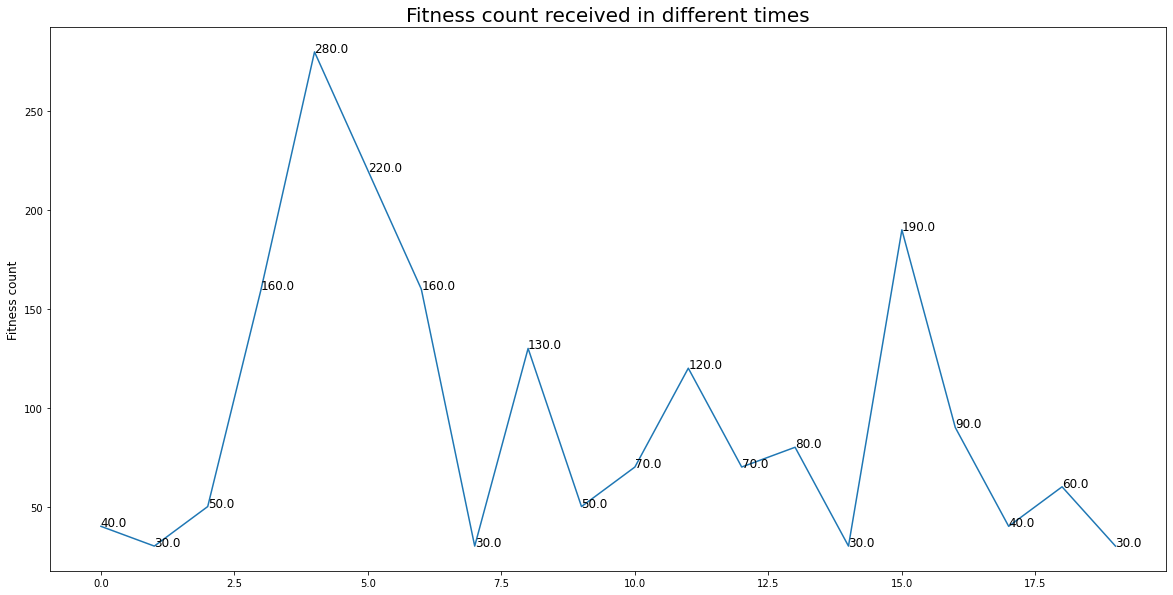

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(20)
plt.title("Fitness count received in different times", size=20)
plt.ylabel("Fitness count", size=12)
y=fitness_count[x]
plt.plot(x, y)
for index in range(len(x)):
  ax.text(x[index], y[index], y[index], size=12)
plt.show()

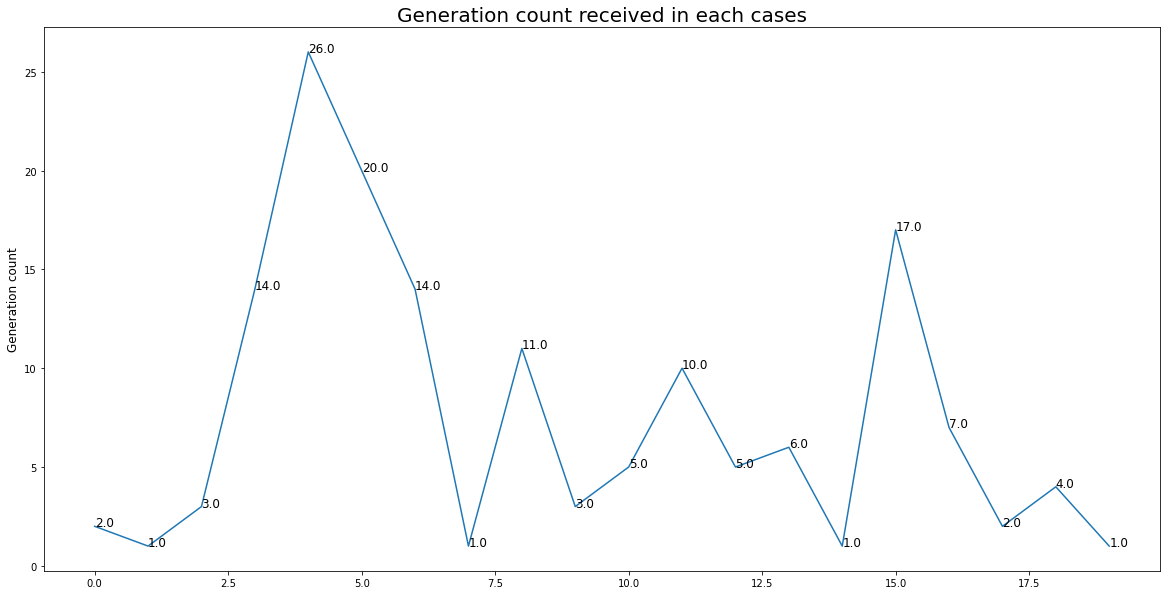

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(20)
plt.title("Generation count received in each cases", size=20)
plt.ylabel("Generation count", size=12)
y=generation_count[x]
plt.plot(x, y)
for index in range(len(x)):
  ax.text(x[index], y[index], y[index], size=12)
plt.show()

Final Result

In [95]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable([" ", "Mean", "Median", "Standard Deviation"])

# Add rows
myTable.add_row(["Fitness Count", np.mean(fitness_count), np.median(fitness_count), np.std(fitness_count)])
myTable.add_row(["Generation Count", np.mean(generation_count), np.median(generation_count), np.std(generation_count)])


print(myTable)

+------------------+------+--------+--------------------+
|                  | Mean | Median | Standard Deviation |
+------------------+------+--------+--------------------+
|  Fitness Count   | 96.5 |  70.0  | 70.30469401113983  |
| Generation Count | 7.65 |  5.0   | 7.030469401113983  |
+------------------+------+--------+--------------------+


**Submitted By**

---
1.   Aneetta Sara Shany - *MTech CSE Software Engineering*
2.   Anu Zacharia - *MTech CSE Data Science and AI*

**Guide**

---
Dr. Jereesh A S
